# Libraries, Dates and Data

In [1]:
#import libraries
import yfinance as yf
import pandas as pd
from causalimpact import CausalImpact 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Dates
training_start = "2014-01-08"
training_end = "2015-08-26"
treatment_start = "2015-09-02"
treatment_end = "2015-09-30"
end_stock = "2015-10-02"

In [3]:
#Download VW stock
y = ["VOW.DE"]
y = yf.download(tickers = y,
                start = training_start,
                end = end_stock,
                interval = "1wk",
                multi_level_index=False)
y = y['Close'].rename("y")
y.head(1)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Date
2014-01-06    132.02504
Name: y, dtype: float64

In [4]:
#Dowload the control groups
stocks = ["META", "DIS", "NVS", "AMZ"]
X = yf.download(tickers = stocks,
                start = training_start,
                end = end_stock,
                interval = "1wk")
X = X.iloc[:,:len(stocks)]
X.columns = X.columns.droplevel()
X.head()

[*********************100%***********************]  4 of 4 completed


Ticker,AMZ,DIS,META,NVS
Date,,,,
2014-01-06,290.200012,68.244949,57.623871,47.175335
2014-01-13,296.000000,66.968582,55.992821,47.082539
2014-01-20,287.000000,65.828003,54.152916,46.305374
2014-01-27,271.299988,65.728401,62.228615,45.858788
2014-02-03,260.450012,68.498398,63.969070,46.931751


In [5]:
#Combine everything
X.index = X.index.tz_localize(None)
df = pd.concat([y, X], axis = 1).dropna()
df.head()

,y,AMZ,DIS,META,NVS
Date,,,,,
2014-01-06,132.025040,290.200012,68.244949,57.623871,47.175335
2014-01-13,133.684708,296.000000,66.968582,55.992821,47.082539
2014-01-20,125.318802,287.000000,65.828003,54.152916,46.305374
2014-01-27,122.168884,271.299988,65.728401,62.228615,45.858788
2014-02-03,123.625320,260.450012,68.498398,63.969070,46.931751


# Correlation Matrix

In [6]:
#Subset the training data
df_training = df[df.index <= training_end]
df_training.tail()

,y,AMZ,DIS,META,NVS
Date,,,,,
2015-07-13,143.366364,445.350006,109.596359,94.451828,65.229698
2015-07-27,130.175522,484.250000,110.647514,93.497078,63.959751
2015-08-10,127.311012,478.299988,98.808228,93.904831,63.176823
2015-08-17,116.701767,445.049988,91.136665,85.590446,60.143742
2015-08-24,120.591827,465.399994,94.492973,90.513428,60.630760


<Axes: >

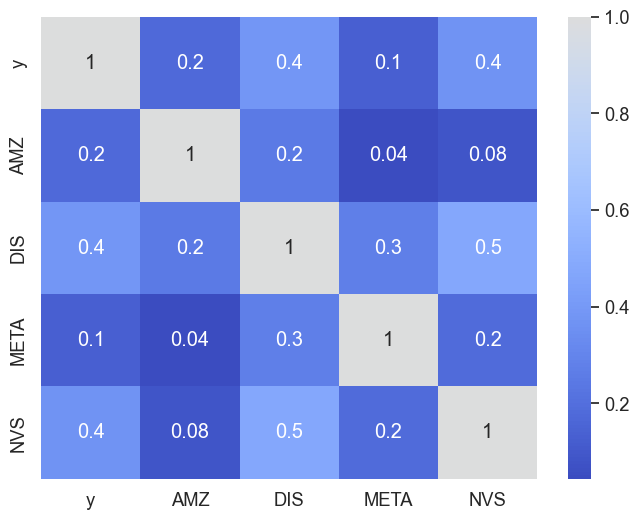

In [7]:
#Heatmap
plt.figure(figsize = (8,6))
sns.set(font_scale = 1.2)
sns.heatmap(data = df_training.pct_change().dropna().corr(),
            annot = True,
            fmt = '.1g',
            cmap = 'coolwarm',
            center = True)

In [8]:
#Preparing final df
df_final = df.drop(columns = ["META", "AMZ"])
df_final.head(0)

,y,DIS,NVS
Date,,,


# Google Causal Impact

In [9]:
#Get first and last date
print(df_final.head(1))
print(df_final.tail(10))

                    y        DIS        NVS
Date                                       
2014-01-06  132.02504  68.244949  47.175335
                     y         DIS        NVS
Date                                         
2015-07-13  143.366364  109.596359  65.229698
2015-07-27  130.175522  110.647514  63.959751
2015-08-10  127.311012   98.808228  63.176823
2015-08-17  116.701767   91.136665  60.143742
2015-08-24  120.591827   94.492973  60.630760
2015-08-31  113.129990   93.100655  58.288132
2015-09-07  117.585876   96.337097  59.521084
2015-09-14  114.120178   94.824898  59.582733
2015-09-21   81.726608   92.482864  56.290737
2015-09-28   71.541718   94.972435  57.499035


In [10]:
#Dates
training_start = "2014-01-06"
training_end = "2015-08-31"
treatment_start = "2015-09-07"
treatment_end = "2015-09-28"
end_stock = "2015-10-02"

In [11]:
#Define Pre and Post Period
pre_period = [training_start, training_end]
post_period = [treatment_start, treatment_end]

In [12]:
#CI
impact = CausalImpact(data = df_final,
                      pre_period = pre_period,
                      post_period = post_period)

c:\Program Files\Python313\Lib\site-packages\causalimpact\main.py:603: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  if not data.applymap(np.isreal).values.all():
c:\Program Files\Python313\Lib\site-packages\causalimpact\main.py:302: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.mu_sig = (mu[0], sig[0])
c:\Program Files\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Program Files\Python313\Lib\site-packages\statsmodels\base\optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for 

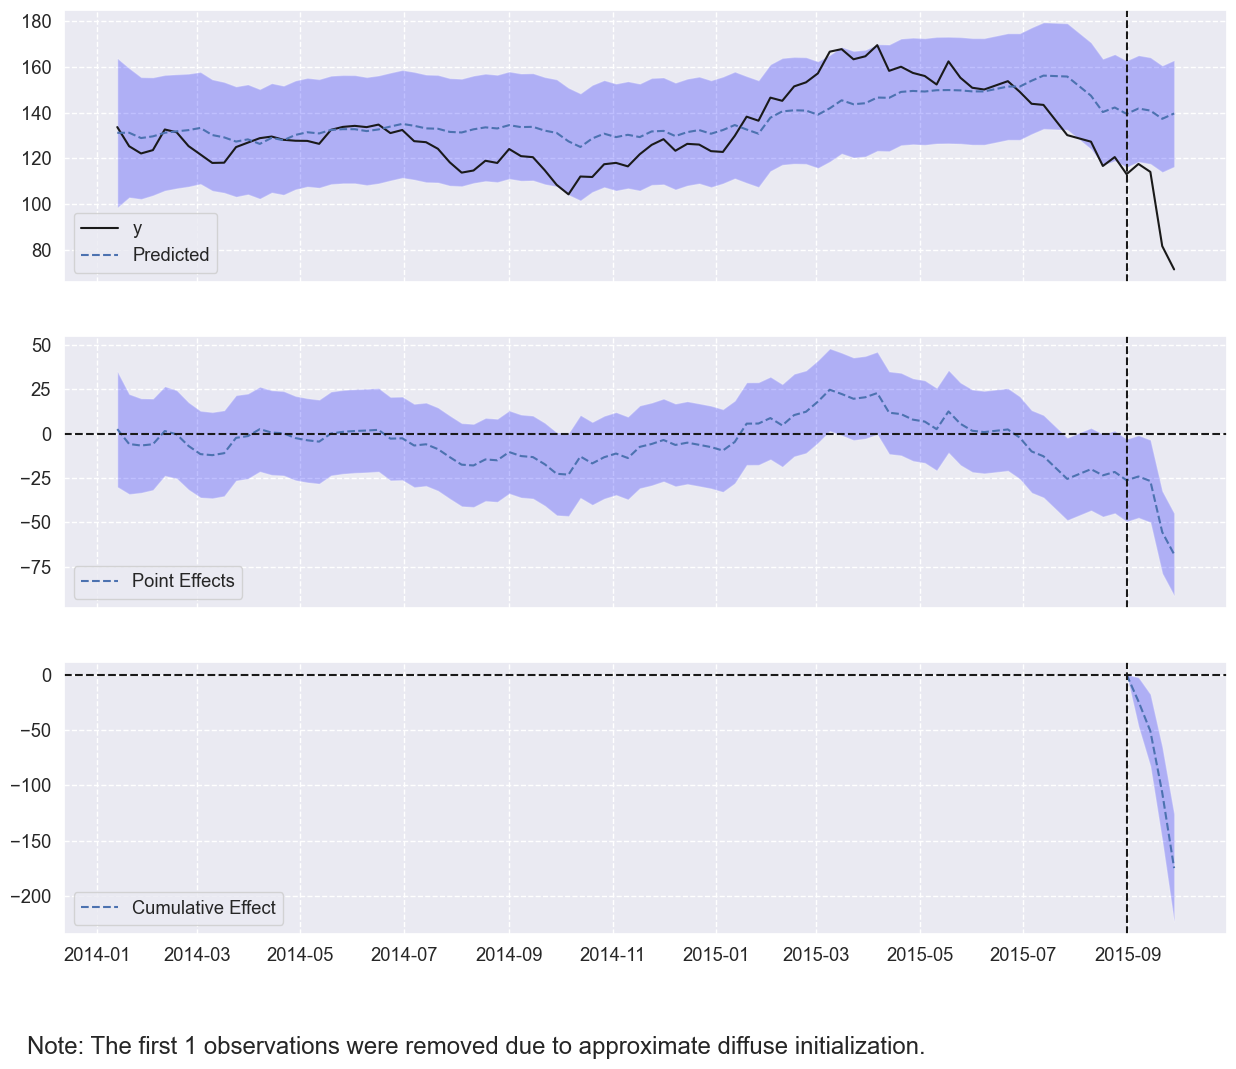

In [13]:
#Output
impact.plot()

In [14]:
#summary
print(impact.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    96.24              384.97
Prediction (s.d.)         139.91 (6.21)      559.62 (24.84)
95% CI                    [127.64, 151.98]   [510.57, 607.93]

Absolute effect (s.d.)    -43.66 (6.21)      -174.65 (24.84)
95% CI                    [-55.74, -31.4]    [-222.96, -125.59]

Relative effect (s.d.)    -31.21% (4.44%)    -31.21% (4.44%)
95% CI                    [-39.84%, -22.44%] [-39.84%, -22.44%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [15]:
print(impact.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 96.24. By contrast, in the absence of an
intervention, we would have expected an average response of 139.91.
The 95% interval of this counterfactual prediction is [127.64, 151.98].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is -43.66 with a 95% interval of
[-55.74, -31.4]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 384.97.
By contrast, had the intervention not taken place, we would have expected
a sum of 559.62. The 95% interval of this prediction is [510.57, 607.93].


The above results are given in terms of absolute numbers. In relative
terms, the response v